In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sb 

In [22]:
df = pd.read_csv('iris.csv')

In [23]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.shape

(150, 6)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [27]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
iris = df.drop('Id', axis=1)

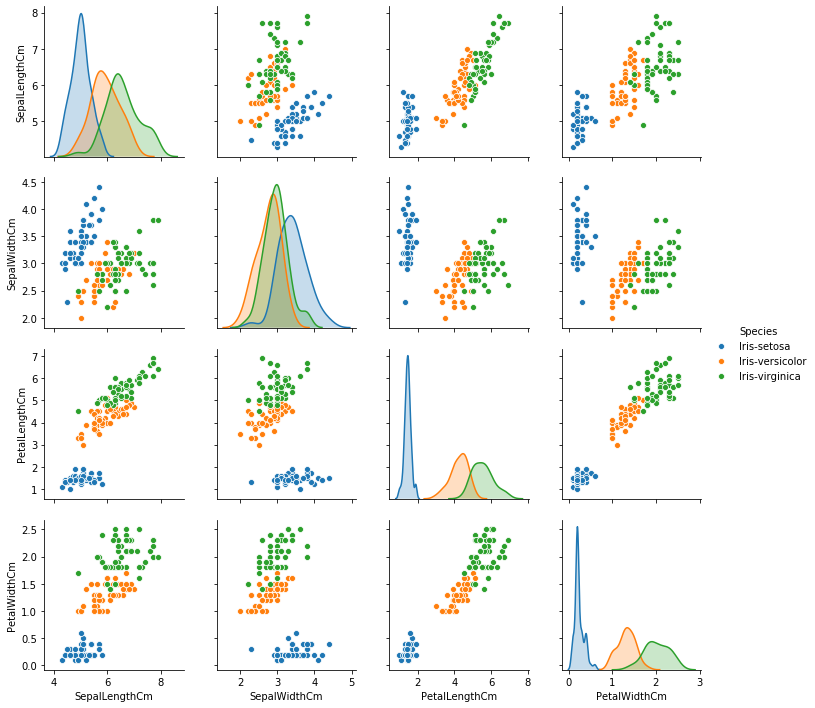

In [31]:
sb.pairplot(iris, hue= "Species", markers= 'o')
plt.show()

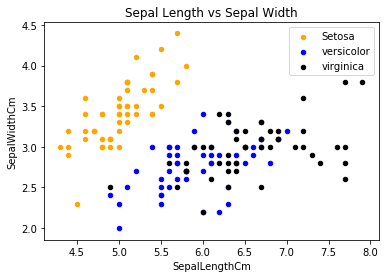

<Figure size 720x504 with 0 Axes>

In [43]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind= 'scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color = 'orange', label= 'Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind= 'scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color = 'blue', label= 'versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind= 'scatter', x= 'SepalLengthCm', y= 'SepalWidthCm', color = 'black', label= 'virginica', ax=fig)

fig.set_xlabel('SepalLengthCm')
fig.set_ylabel('SepalWidthCm')
fig.set_title("Sepal Length vs Sepal Width")

fig = plt.gcf()
plt.figure(figsize=(10,7))
plt.show()

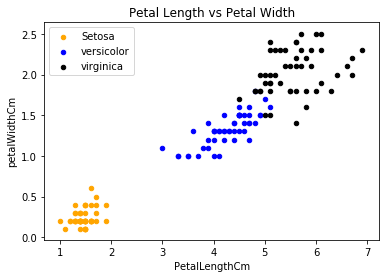

<Figure size 1080x288 with 0 Axes>

In [39]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind= 'scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color = 'orange', label= 'Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind= 'scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color = 'blue', label= 'versicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind= 'scatter', x= 'PetalLengthCm', y= 'PetalWidthCm', color = 'black', label= 'virginica', ax=fig)

fig.set_xlabel('PetalLengthCm')
fig.set_ylabel('petalWidthCm')
fig.set_title("Petal Length vs Petal Width")

fig = plt.gcf()
fig = plt.figure(figsize=(15,4))
plt.show()

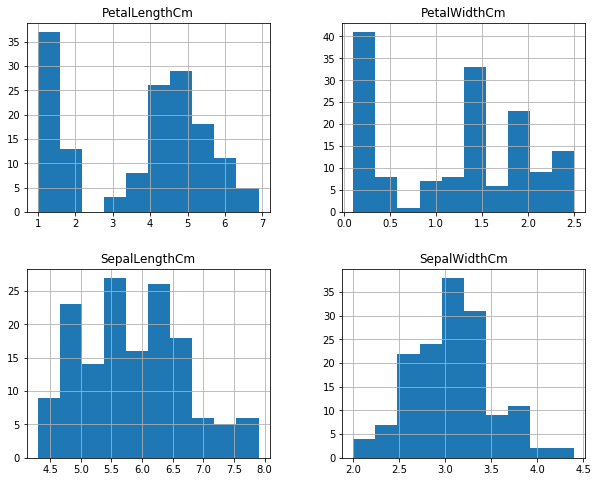

In [37]:
iris.hist(figsize=(10,8))

plt.show()

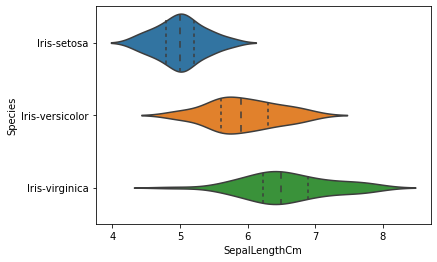

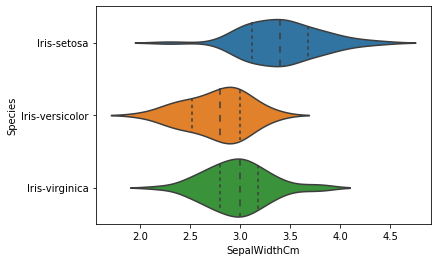

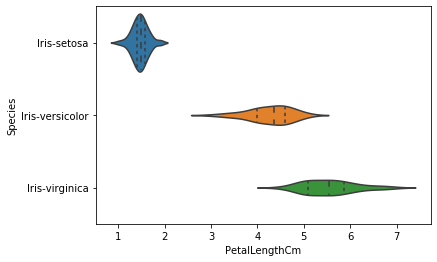

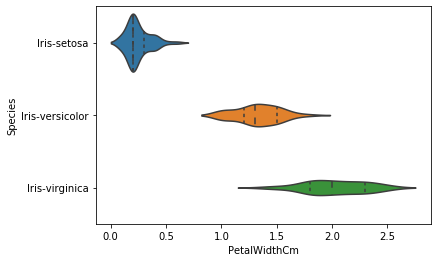

In [42]:
sb.violinplot(y='Species', x= 'SepalLengthCm', data= iris, inner= 'quartile')
plt.show()

sb.violinplot(y='Species', x= 'SepalWidthCm', data= iris, inner= 'quartile')
plt.show()

sb.violinplot(y='Species', x= 'PetalLengthCm', data= iris, inner= 'quartile')
plt.show()

sb.violinplot(y='Species', x= 'PetalWidthCm', data= iris, inner= 'quartile')
plt.show()

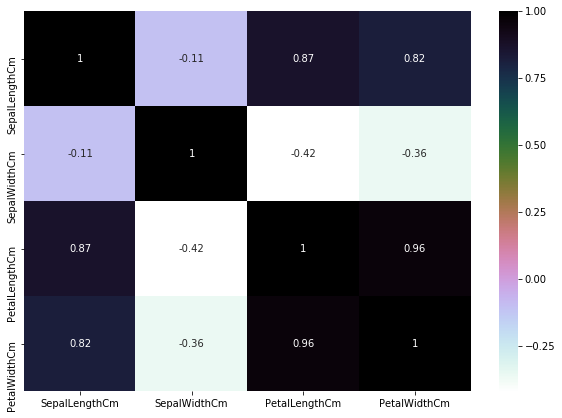

In [47]:
plt.figure(figsize=(10,7))
sb.heatmap(iris.corr(), annot = True, cmap= 'cubehelix_r')
plt.show()

In [48]:
x = iris.drop(['Species'], axis= 1)
y = iris['Species']

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split (x, y, test_size = 0.3, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [51]:
from sklearn.linear_model import LogisticRegression 

logr = LogisticRegression()
logr.fit(x_train,y_train)

C:\Users\ajulo dami\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajulo dami\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
from sklearn import metrics

y_pred =  logr.predict(x_test)

accuracy = metrics.accuracy_score(y_pred, y_test)

print("the accuracy of the Logistics Regression is ", accuracy)



the accuracy of the Logistics Regression is  0.9333333333333333


In [56]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

accuracy = metrics.accuracy_score(y_pred, y_test)

print("the accuracy of the Decision Tree is ", accuracy)

the accuracy of the Decision Tree is  0.9777777777777777


In [59]:
sv = svm.SVC()

sv.fit(x_train, y_train)

y_pred = sv.predict(x_test)

accuracy = metrics.accuracy_score(y_pred, y_test)

print("the accuracy of the SVM is ", accuracy)

the accuracy of the SVM is  1.0


C:\Users\ajulo dami\Documents\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
